# Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Import Dataset

In [2]:
dataset = pd.read_csv('Data.csv')

In [3]:
dataset.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int64
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


In [5]:
dataset.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


<Axes: >

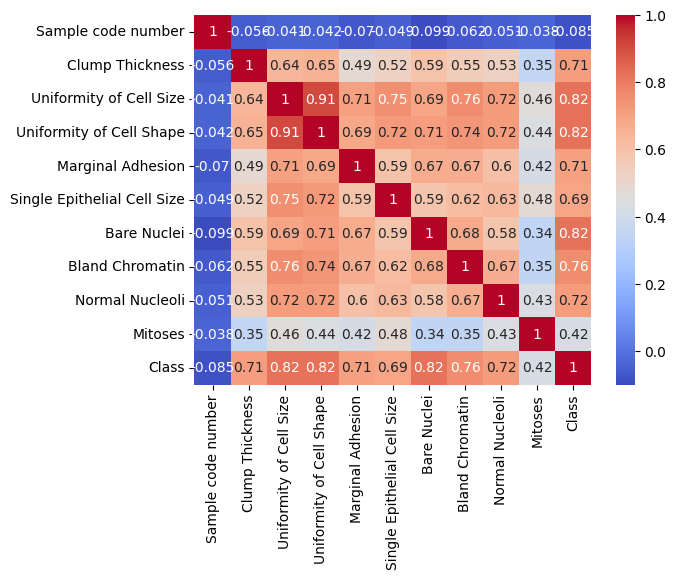

In [6]:
correlation = dataset.corr()
sns.heatmap(correlation, annot=True , cmap='coolwarm')

In [7]:
X = dataset.drop('Class', axis=1)
y = dataset['Class']

#Split Dataset

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Terapkan Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Latih Model

## Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

In [16]:
print(accuracy_score(y_test, y_pred_log_reg))
print(confusion_matrix(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

0.9562043795620438
[[84  3]
 [ 3 47]]
              precision    recall  f1-score   support

           2       0.97      0.97      0.97        87
           4       0.94      0.94      0.94        50

    accuracy                           0.96       137
   macro avg       0.95      0.95      0.95       137
weighted avg       0.96      0.96      0.96       137



## Naive Bayes

In [17]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

In [18]:
print(accuracy_score(y_test, y_pred_nb))
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

0.948905109489051
[[80  7]
 [ 0 50]]
              precision    recall  f1-score   support

           2       1.00      0.92      0.96        87
           4       0.88      1.00      0.93        50

    accuracy                           0.95       137
   macro avg       0.94      0.96      0.95       137
weighted avg       0.96      0.95      0.95       137



## Support Vector Machine

In [23]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=0)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

In [24]:
print(accuracy_score(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

0.9562043795620438
[[82  5]
 [ 1 49]]
              precision    recall  f1-score   support

           2       0.99      0.94      0.96        87
           4       0.91      0.98      0.94        50

    accuracy                           0.96       137
   macro avg       0.95      0.96      0.95       137
weighted avg       0.96      0.96      0.96       137



## K-Nearest Neighbors

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [26]:
print(accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

0.9562043795620438
[[83  4]
 [ 2 48]]
              precision    recall  f1-score   support

           2       0.98      0.95      0.97        87
           4       0.92      0.96      0.94        50

    accuracy                           0.96       137
   macro avg       0.95      0.96      0.95       137
weighted avg       0.96      0.96      0.96       137



## Decision Tree Classification


In [27]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy', random_state=0)
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)

In [28]:
print(accuracy_score(y_test, y_pred_dtc))
print(confusion_matrix(y_test, y_pred_dtc))
print(classification_report(y_test, y_pred_dtc))

0.9708029197080292
[[85  2]
 [ 2 48]]
              precision    recall  f1-score   support

           2       0.98      0.98      0.98        87
           4       0.96      0.96      0.96        50

    accuracy                           0.97       137
   macro avg       0.97      0.97      0.97       137
weighted avg       0.97      0.97      0.97       137



## Random Forest Regression

In [31]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

In [32]:
print(accuracy_score(y_test, y_pred_rfc))
print(confusion_matrix(y_test, y_pred_rfc))
print(classification_report(y_test, y_pred_rfc))

0.9708029197080292
[[84  3]
 [ 1 49]]
              precision    recall  f1-score   support

           2       0.99      0.97      0.98        87
           4       0.94      0.98      0.96        50

    accuracy                           0.97       137
   macro avg       0.97      0.97      0.97       137
weighted avg       0.97      0.97      0.97       137

